## Shopping Mall Customers Segmentation
### Objective
Divide customers into separate groups to understand the targets for marketing approach.
### Objective Questions?
 - How many segments are required for customers?
 - What kinds of people are more dominant in spending money?
 - Which age groups are most likely to spend their money?
### Procedure of Segmentation & Analysis
 - Performing Qucik EDAs
 - Create segments with K-Means Clustering
 - Summary statistics on Clusters
 - Visualize the data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\RimoNahiM\Documents\Work\Python Project Files\Customer Segmentation Project\Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Analysis (Univariate & Bivariate)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


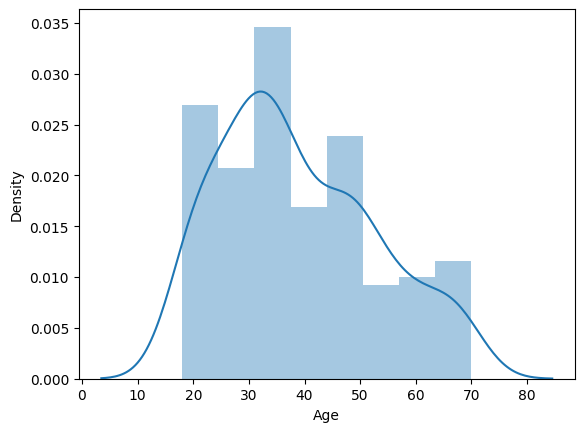

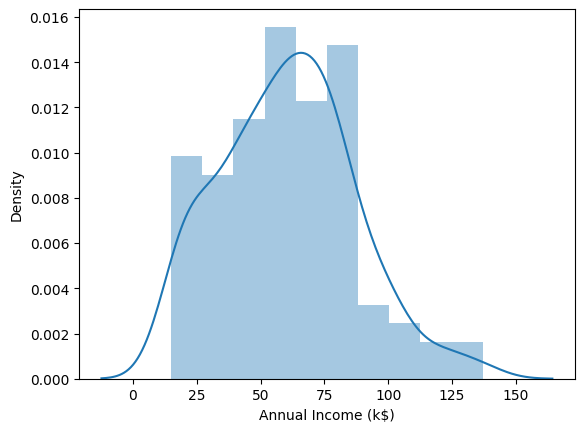

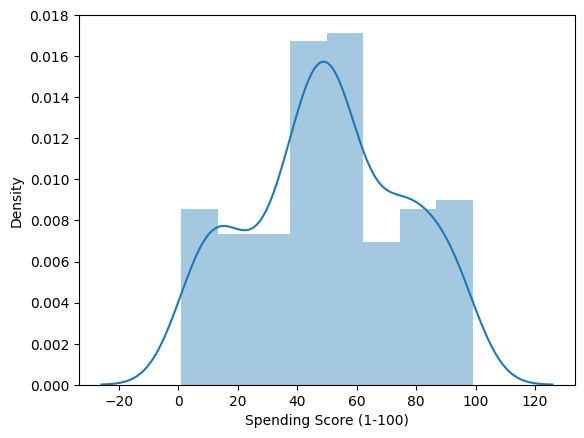

In [8]:
# Make distplots for each of the valid columns
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure();
    sns.distplot(df[col])

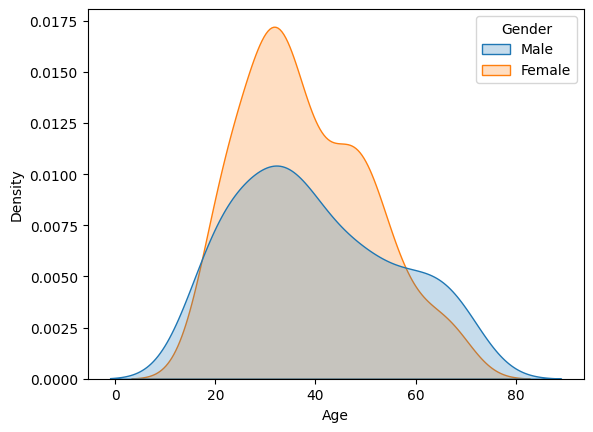

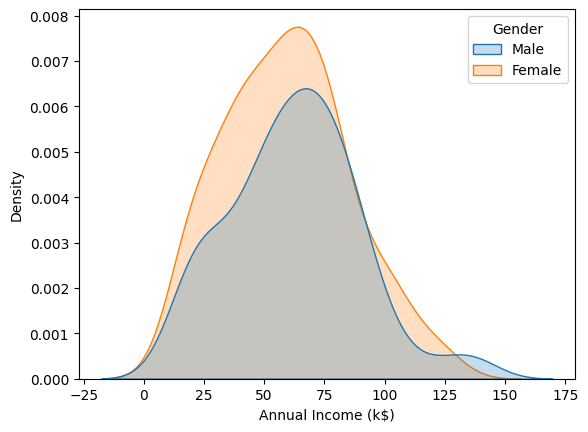

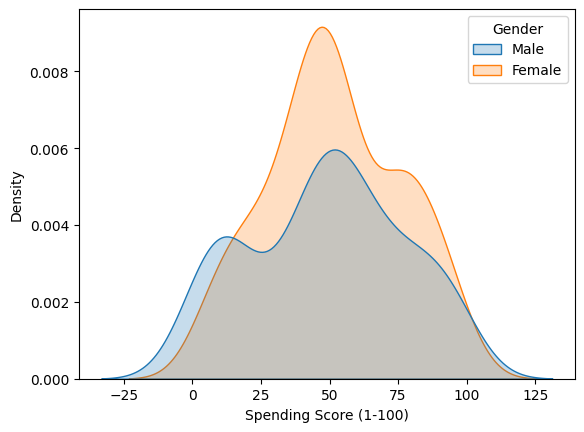

In [9]:
# Make kde for each of the valid columns

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[col], shade=True, hue='Gender')

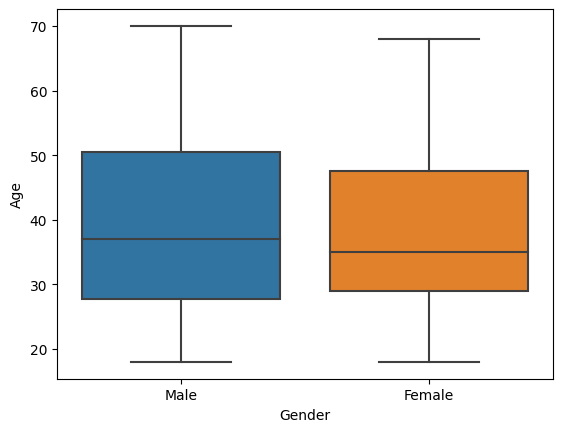

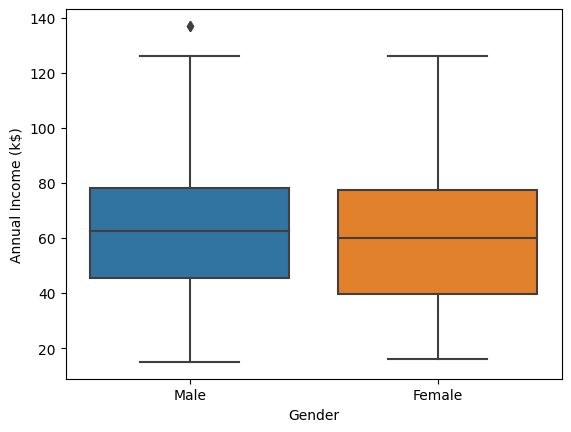

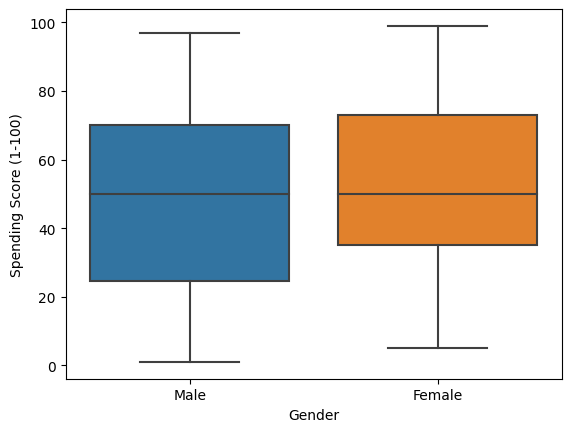

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[col])

In [11]:
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True))

Female    112
Male       88
Name: Gender, dtype: int64
Female    0.56
Male      0.44
Name: Gender, dtype: float64


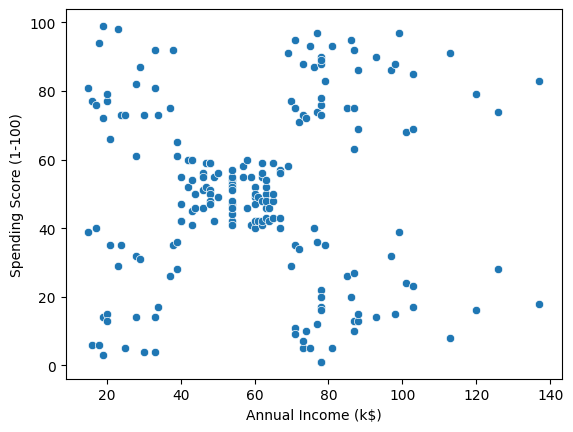

In [12]:
# Scatter plot on annual income and spending

sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)');

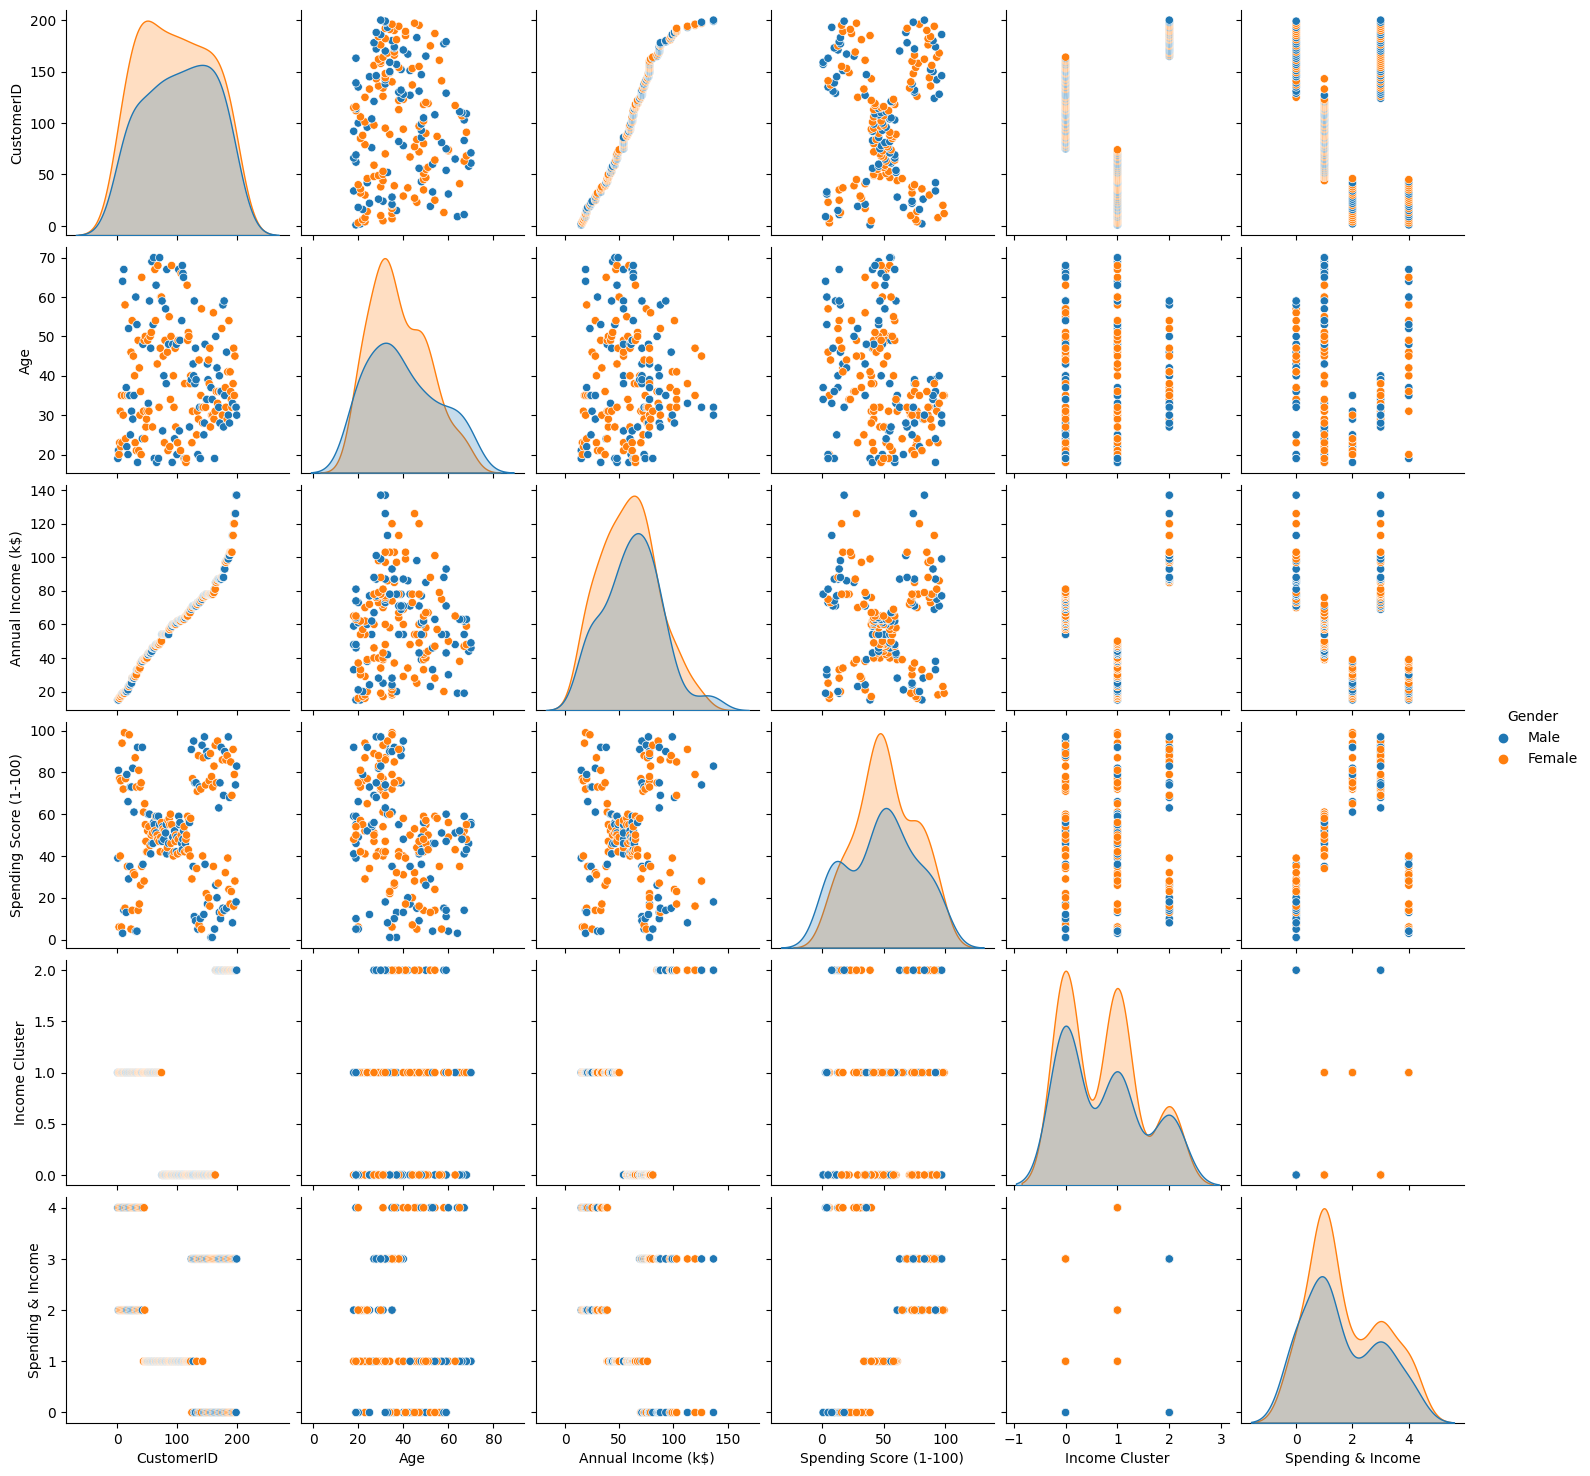

In [76]:
sns.pairplot(df, hue="Gender");
plt.savefig('dataset_pairplot.jpg')

In [14]:
# Grouping By Gender 
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


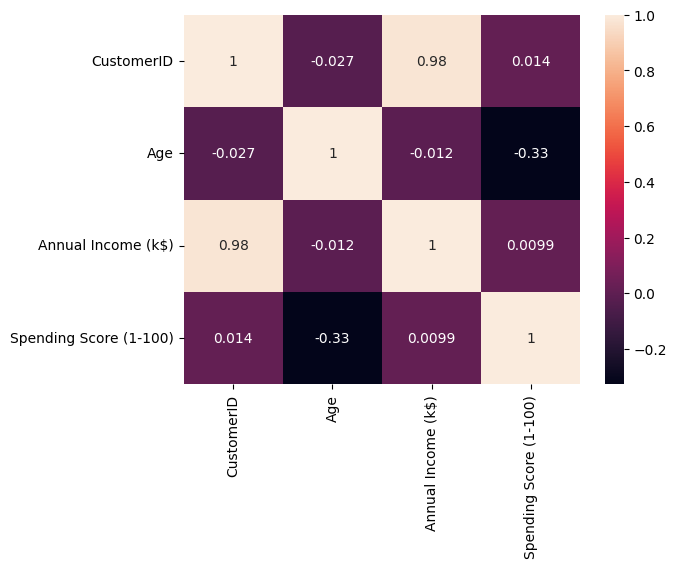

In [16]:
# Corelation Metrics
sns.heatmap(df.corr(), annot=True);

### Clustering approach

In [38]:
# Apply K-Means Clustering
cluster1 = KMeans(n_clusters=3)
cluster1.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = cluster1.labels_
cluster1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
print(df['Income Cluster'].value_counts())
df.head(10)

0    90
1    74
2    36
Name: Income Cluster, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1
7,8,Female,23,18,94,1
8,9,Male,64,19,3,1
9,10,Female,30,19,72,1


In [40]:
# Inertia Scores and Curve
inertia_scores = []
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(Kmeans.inertia_)
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3941.4163614163617,
 2857.441697191697,
 2185.5904761904767,
 1743.4772727272725]

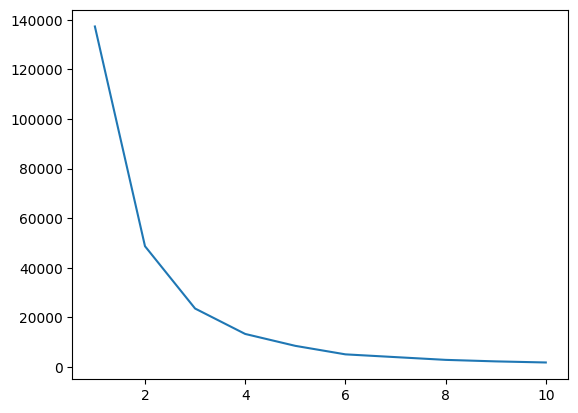

In [36]:
plt.plot(range(1,11),inertia_scores);

In [41]:
# Grouping Income Cluster
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [47]:
# Bivariate the clustering
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending & Income'] = cluster2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


In [48]:
inertia_scores2 = []
for i in range(1,11):
    Kmeans2=KMeans(n_clusters=i)
    Kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(Kmeans2.inertia_)
inertia_scores2

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30273.394312070042,
 24986.52564064288,
 22851.508369408373,
 19641.456216651568]

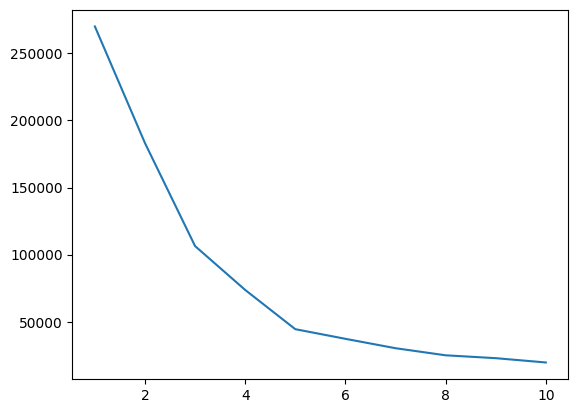

In [49]:
plt.plot(range(1,11),inertia_scores2);

### So, the ideal segments for the customers is 5.

In [52]:
# Finding the centers
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


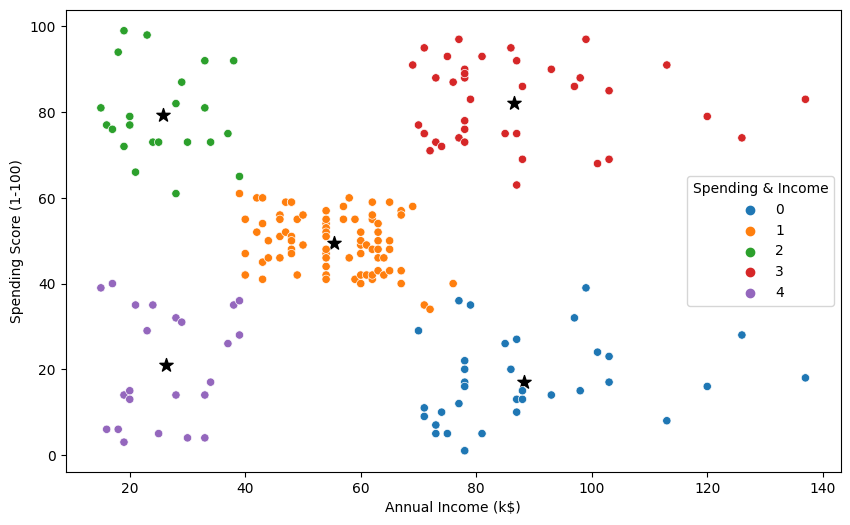

In [75]:
# Analyzing the clustering
plt.figure(figsize=(10,6))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)',
                hue='Spending & Income',
                palette='tab10');
plt.savefig('Clustering_Bivariate.jpg')

In [55]:
# Crostab 
pd.crosstab(df['Spending & Income'], df['Gender'], normalize='index')

Gender,Female,Male
Spending & Income,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


#### As seen, the female groups are more dominant than the male groups.

In [56]:
# Groupby Spending and Income
df.groupby('Spending & Income')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


#### So, the cluster 2 peoples are most likely to spend their money.

In [57]:
# Multivariate approach
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [58]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


In [64]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income,Gender_Male
0,1,19,15,39,1,4,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,4,0


In [65]:
dff2 = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [69]:
dff2 = scale.fit_transform(dff2)
dff2 = pd.DataFrame(scale.fit_transform(dff2))
dff2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [70]:
inertia_scores3 = []
for i in range(1,11):
    Kmeans3=KMeans(n_clusters=i)
    Kmeans3.fit(dff2)
    inertia_scores3.append(Kmeans3.inertia_)
inertia_scores3

[800.0000000000002,
 588.8026767824936,
 476.7732065607644,
 388.50737746551056,
 325.0949800888802,
 278.53728367443375,
 239.32786167263328,
 199.7847820892609,
 174.1880002218681,
 152.08676298710697]

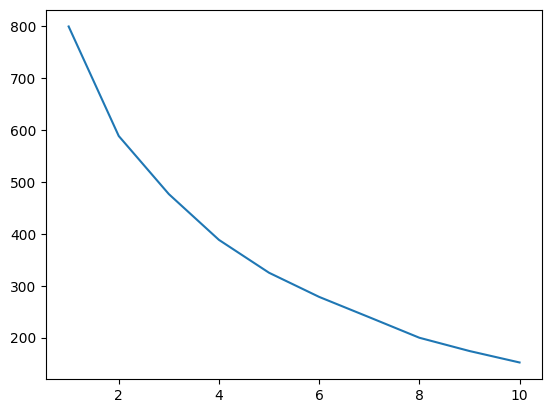

In [71]:
plt.plot(range(1,11),inertia_scores3);

#### The maltivariate approach is not ideal.

In [73]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4
5,6,Female,22,17,76,1,2
6,7,Female,35,18,6,1,4
7,8,Female,23,18,94,1,2
8,9,Male,64,19,3,1,4
9,10,Female,30,19,72,1,2


In [74]:
# Svaing the dataset
df.to_csv('CustomerSegmentation.csv')

## Analysis Result :
 - We can divide our customers into 5 different groups.
 - The female group consists of large customers who spend over 82.12% of their income.
 - Young people aged 20 to 30 have low incomes, but high on spending.